Linear regression is a very simple approach for machine learning which is a useful tool for predicting quantitative responses. Although it may seem somewhat dull in comparison, it is a widely used statistical learning method that serves as a good jumping-off point for new approaches. Many fancy statistical learning approaches can be seen as a generalization or extension of linear regression. 

Recall the **Advertising** dataset which has *sales* of a product as a function of three advertising budgets: *TV*, *radio*, and *newspaper*. Suppose we are asked to suggest a marketing plan for the next year that will result in high product sales. What information would be useful in order to provide such a recommendation?  
1. Is there a relationship between advertising budget and sales?  
2. How strong is the relationship between advertising budet and sales?  
3. Which media contribute to sales?  
4. How accurately can we estimate the effect of each medium on sales?  
5. How accurately can we predict future sales?  
6. Is the relationship linear?  
7. Is there synergy among the advertising media?  

# Simple Linear Regression
This is a very straightforward approach for predicting a quantitative response $Y$ on the basis of a single predictor $X$. It assumes that there is approximately a linear relationship between $X$ and $Y$:  

$$Y \approx \beta_0 + \beta_1X$$  
The $\approx$ can be read as *"is approximately modeled as"* or can be described as *regressing $Y$ on $X$*. We can regress *sales* on *TV* by fitting the model:  

$$sales \approx \beta_0 + \beta_1 \times TV$$  
$\beta_0$ and $\beta_1$ are the unknown coefficients (parameters) that represent *intercept* and *slope* respectively in the linear model. Once we've used our training data to produce estimates for $\widehat{\beta}_0$ and $\widehat{\beta}_1$ we can predict future sales for a particular value of TV advertising with:  

$$\widehat{y} = \widehat{\beta}_0 + \widehat{\beta}_1x$$
where $\widehat{y}$ indicates a prediction of $Y$ on the basis of $X = x$. The *hat* symbol ($\widehat{ }$) denotes the estimated value for an unknown parameter, coefficient, or predicted value of a response.

## Estimating the Coefficients
Since $\beta_0$ and $\beta_1$ are usually unknown, we must use data to estimate them. Let $(x_1, y_1), (x_2, y_2), ..., (x_n, y_n)$ be the $n$ observation pairs. Our goal is to obtain coefficient estimates $\widehat{\beta}_0$ and $\widehat{\beta}_1$ such that the linear model fits the available data well, that is $y_i \approx \widehat{\beta}_0 + \widehat{\beta}_1x_i$ for $i = 1, ..., n$. There are many ways of measuring *closeness*, but the most common approach involves minimizing the *least squares* criterion.  

Let $\widehat{y}_i = \widehat{\beta}_0 + \widehat{\beta}_1x_i$ be the prediction for $Y$ based on the $i$th value of $X$. Then $e_i = y_i - \widehat{y}_i$ represents the *residual error* or the difference between the $i$th observed response and the $i$th predicted response from the linear model. We define the *residual sum of squares* (RSS) as:  

$$RSS = e_1^2 + e_2^2 + ... + e_n^2$$
or equivalently:  

$$RSS = (y_1 - \widehat{\beta}_0 - \widehat{\beta}_1x_1)^2 + (y_2 - \widehat{\beta}_0 - \widehat{\beta}_1x_2)^2 + ... + (y_n - \widehat{\beta}_0 - \widehat{\beta}_1x_n)^2 = \sum_{i=1}^n(y_i - \widehat{\beta}_0 - \widehat{\beta}_1x_i)^2$$

### (Supplement) Deriving the Simple Linear Regression Coefficients
$RSS$ will be minimized at the values of $\widehat{\beta}_0$ and $\widehat{\beta}_1$ for which $\frac{\partial{RSS}}{\partial{\widehat{\beta}_0}} = 0$ and $\frac{\partial{RSS}}{\partial{\widehat{\beta}_1}} = 0$. Let's start with $\frac{\partial{RSS}}{\partial{\widehat{\beta}_0}}$:  

$$\frac{\partial{RSS}}{\partial{\widehat{\beta}_0}} = \sum_{i=1}^n2(y_i - \widehat{\beta}_0 - \widehat{\beta}_1x_i) = 2(n\widehat{\beta}_0 + \widehat{\beta}_1\sum_{i=1}^nx_i - \sum_{i=1}^ny_i) = 0$$  
If we divide through by 2 and $n$ then use the sample means definitions $\bar{x} \equiv \frac{1}{n}\sum_{i=1}^nx_i$ and $\bar{y} \equiv \frac{1}{n}\sum_{i=1}^ny_i$, this equation can be rewritten as:  

$$\widehat{\beta}_0 - \bar{y} - \widehat{\beta}_1\bar{x}$$
Now for $\frac{\partial{RSS}}{\partial{\widehat{\beta}_1}}$:  

$$\frac{\partial{RSS}}{\partial{\widehat{\beta}_1}} = \sum_{i=1}^n-2x_i(y_i - \widehat{\beta}_0 - \widehat{\beta}_1x_i) = \sum_{i=1}^n-2(x_iy_i - \widehat{\beta}_0x_i - \widehat{\beta}_1x_i^2) = 0$$
Substuting the equation for $\widehat{\beta}_0$ from above into this equation we get:  

$$\sum_{i=1}^n(x_iy_i - x_i\bar{y} + \widehat{\beta}_1x_i\bar{x} - \widehat{\beta}_1x_i^2) = 0$$
This can be separated into two sums:  

$$\sum_{i=1}^n(x_iy_i - x_i\bar{y}) - \widehat{\beta}_1\sum_{i=1}^n(x_i^2 - x_i\bar{x}) = 0$$  
Solving for $\widehat{\beta}_1$ we get:  

$$\widehat{\beta}_1 = \frac{\sum_{i=1}^n(x_iy_i - x_i\bar{y})}{\sum_{i=1}^n(x_i^2 - x_i\bar{x})} = \frac{\sum_{i=1}^n(x_iy_i) - n\bar{x}\bar{y}}{\sum_{i=1}^n(x_i^2) - n\bar{x}^2}$$
Using these zero identities:  

$$\sum_{i=1}^n(\bar{x}^2 - x_i\bar{x}) = 0 \qquad\text{and}\qquad \sum_{i=1}^n(\bar{x}\bar{y} - y_i\bar{x}) = 0,$$  
we can translate the previous equation into a more intuitively obvious form:  

$$\widehat{\beta}_1 = \frac{\sum_{i=1}^n(x_iy_i - x_i\bar{y}) + \sum_{i=1}^n(\bar{x}\bar{y} - y_i\bar{x})}{\sum_{i=1}^n(x_i^2 - x_i\bar{x}) + \sum_{i=1}^n(\bar{x}^2 - x_i\bar{x})},$$  
Which can be factorized into the final form of $\widehat{\beta}_1$:  

$$\boxed{\widehat{\beta}_1 = \frac{\sum_{i=1}^n(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n(x_i - \bar{x})^2}}$$  
And for $\widehat{\beta}_0$:  

$$\boxed{\widehat{\beta}_0 = \bar{y} - \widehat{\beta}_1\bar{x}}$$  

These two equations define the *least squares coefficient estimates* for simple linear regression.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import axes3d

%matplotlib inline

In [2]:
#read the data and separate the predictor and response to numpy arrays
advertising = pd.read_csv('../data/Advertising.csv', index_col=0)
X = np.array(advertising['TV'])
y = np.array(advertising['sales'])
#calculate the least squares coefficients
b1 = ((X - X.mean()) * (y - y.mean())).sum() / ((X - X.mean())**2).sum()
b0 = y.mean() - b1 * X.mean()
print('Intercept: {:.2f}\nSlope: {:.4f}'.format(b0, b1))
print('Minimum RSS: {:.4f}'.format(((y - b0 - b1 * X)**2).sum()))

Intercept: 7.03
Slope: 0.0475
Minimum RSS: 2102.5306


**Note**: The figures in the book describes the coefficents in terms of uncentered data whereas the plots show the model based on centered data. To properly visualize the RSS in terms of centered data, we need to center $X$ and recalculate $\widehat{\beta}_0$ and $\widehat{\beta}_1$.

Intercept: 14.02
Slope: 0.0475
Minimum RSS: 2102.5306
Minimum RSS (in $1,000): 2.1025


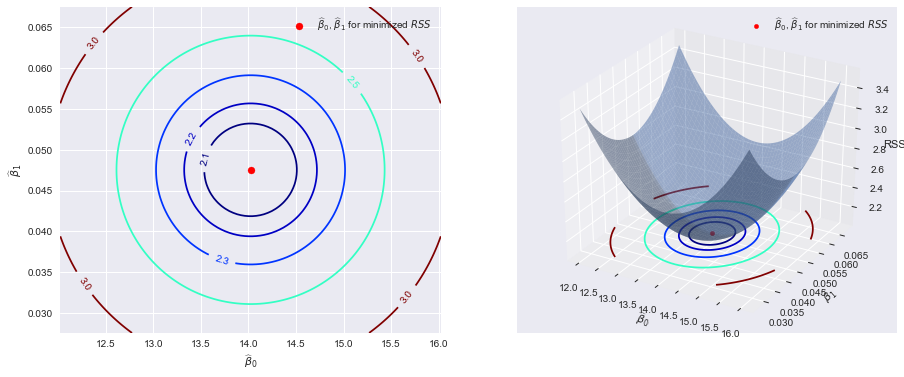

In [3]:
#center the X data
X = X - X.mean()
b1 = ((X - X.mean()) * (y - y.mean())).sum() / ((X - X.mean())**2).sum()
b0 = y.mean() - b1 * X.mean()
print('Intercept: {:.2f}\nSlope: {:.4f}'.format(b0, b1))
print('Minimum RSS: {:.4f}'.format(((y - b0 - b1 * X)**2).sum()))
print('Minimum RSS (in $1,000): {:.4f}'.format(((y - b0 - b1 * X)**2).sum()/1000))
#create a mesh for the coefficients
B0, B1 = np.meshgrid(np.linspace(b0-2, b0+2, 100), np.linspace(b1-0.02, b1+0.02, 100), indexing='xy')
#create a blank numpy array with the same shape as the meshed coefficients
rss = np.zeros_like(B0)
#calculate the RSS for each B0, B1 pair in the meshgrid
for (i, j), v in np.ndenumerate(rss):
    rss[i, j] = ((y - B0[i, j] - B1[i, j] * X)**2).sum()/1000

#need to add the subplots separately since you can't change individual projections 
#with the plt.subplots() command
fig = plt.figure(figsize=(15, 6))
    
#left plot
ax1 = fig.add_subplot(1, 2, 1)
cont = ax1.contour(B0, B1, rss, levels=[2.15, 2.2, 2.3, 2.5, 3], cmap=plt.cm.jet)
ax1.scatter(b0, b1, c='r', label=r'$\widehat{\beta}_0$, $\widehat{\beta}_1$ for minimized $RSS$')
ax1.clabel(cont, inline=True, fintsize=10, fmt='%1.1f');
ax1.set(xlabel=r'$\widehat{\beta}_0$', ylabel=r'$\widehat{\beta}_1$');
ax1.legend()

#right plot
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_surface(B0, B1, rss, alpha=0.5)
#the offset will plot the contours on the plane of the minimum rss value
ax2.contour(B0, B1, rss, offset=rss.min(), levels=[2.15, 2.2, 2.3, 2.5, 3], cmap=plt.cm.jet);
#like offset above, zs will plot the scatter point on the plane of the minimum rss value
ax2.scatter3D(b0, b1, zs=rss.min(), c='r', label=r'$\widehat{\beta}_0$, $\widehat{\beta}_1$ for minimized $RSS$');
ax2.set(xlabel=r'$\widehat{\beta}_0$', ylabel=r'$\widehat{\beta}_1$', zlabel='RSS');
ax2.legend();

### Assessing the Accuracy of the Coefficient Estimates
Recall that the true relationship between $X$ and $Y$ takes the form $Y = f(X) + \epsilon$ for some unknown function $f$, where $\epsilon$ is a mean-zero random error term. If $f$ is appriximated by a linear function, the relationship can be written as:  

$$Y = \beta_0 + \beta_1X + \epsilon$$  
The error term, $\epsilon$, is a catch-all for what we miss with the simple model. Typically it's assumed that $\epsilon$ is independent of $X$. The equation above defines the *population regression line*. 

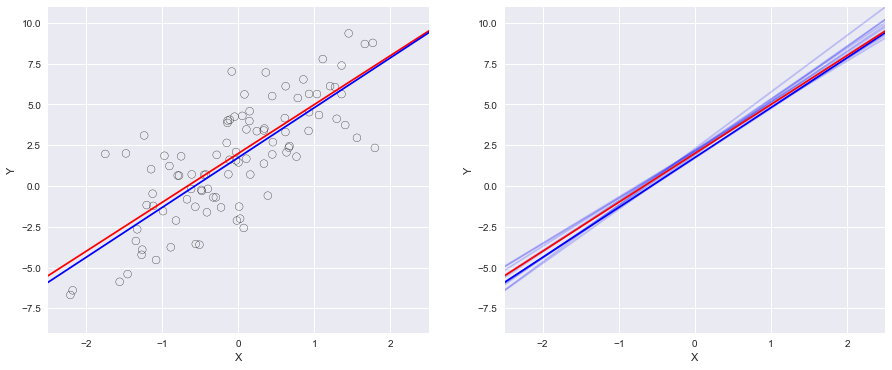

In [4]:
#generate 100 random X values
X = np.random.normal(size=100)
#generate 100 Y values using the model Y = 2 + 3X + epsilon
y = 2 + 3 * X + np.random.normal(scale=2.5, size=100)
#generate the true relationship between X and Y
X_true = np.linspace(-5, 5, 100)
y_true = 2 + 3 * X_true

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

#left plot
#find the coefficients for the sample data
b1 = ((X - X.mean()) * (y - y.mean())).sum() / ((X - X.mean())**2).sum()
b0 = y.mean() - b1 * X.mean()
#use the coefficients to predict y
y_pred = b0 + b1 * X_true
#make the plot
ax1.scatter(X, y, s=60, edgecolors='k', facecolors='none')
ax1.plot(X_true, y_true, c='r')
ax1.plot(X_true, y_pred, c='b')
ax1.set(xlim=[-2.5, 2.5], ylim=[-9, 11], xlabel='X', ylabel='Y');

#right plot
ax2.plot(X_true, y_true, c='r', zorder=5)
ax2.plot(X_true, y_pred, c='b')
for i in range(10):
    X = np.random.normal(size=100)
    y = 2 + 3 * X + np.random.normal(scale=2.5, size=100)
    b1 = ((X - X.mean()) * (y - y.mean())).sum() / ((X - X.mean())**2).sum()
    b0 = y.mean() - b1 * X.mean()
    y_pred = b0 + b1 * X_true
    ax2.plot(X_true, y_pred, c='b', alpha=0.2)
ax2.set(xlim=[-2.5, 2.5], ylim=[-9, 11], xlabel='X', ylabel='Y');

In the figure above, we created 100 random $X$s and generated 100 corresponding $Y$s from the model:  

$$Y = 2 + 3X + \epsilon$$  
where $\epsilon$ was generated from a normal distribution with mean zero. In the left panel, the red line represents the true relationship, $f(X) = 2 + 3X$, while the blue line is the least squares estimate based on the observed data. In the right panel, we similarly generated 10 different datasets using the same model and plotted the least squares estimates.  

The difference between the red line and blue lines is a natural extension to the standard statistical approaches of using information from a sample to estimate charactaristics of a large population. For example, suppose that we wanted to know the population mean $\mu$ of some variable $Y$. Unfortunately, $\mu$ is unknown, but we do have $n$ observations of $Y$ which we can use to estimate $\mu$. A reasonable estimate is $\widehat{\mu} = \bar{y}$ where $\bar{y} = \frac{1}{n}\sum_{i=1}^ny_i$ is the sample mean. Although the sample mean and population mean are different, the sample mean will provide a good estimate of the population mean. Similarly, the unknown coefficients $\beta_0$ and $\beta_1$ can be reasonably estimated with $\widehat{\beta}_0$ and $\widehat{\beta}_1$.  

If we use the sample mean $\widehat{\mu}$ to estimate $\mu$, this estimate is *unbiased* in the sense that on average we expect $\widehat{\mu}$ to equal $\mu$. Individual realizations of $\widehat{\mu}$ may over-estimate or under-estimate $\mu$, but if we could average a huge number of estimates of $\widehat{\mu}$, then this average would exactly equal $\mu$. An unbiased estimator does not *systematically* over- or under-estimate the true parameter. The property of unbiasedness holds for the least squares coefficient estimates as well.  

The natural question that follows is: how accurate is the sample mean $\widehat{\mu}$ as an estimate of $\mu$? In other words: how far off will a single estimate of $\widehat{\mu}$ be? In general, we answer this question by computing the *standard error* of $\widehat{\mu}$, written as $SE(\widehat{\mu})$:  

$$Var(\widehat{\mu}) = SE(\widehat{\mu})^2 = \frac{\sigma^2}{n},$$
where $\sigma$ is the standard deviation of each of the realizations $y_i$ of $Y$. This equation shows how this deviation shrinks with increasing $n$. To compute the standard errors associated with $\widehat{\beta}_0$ and $\widehat{\beta}_1$, we use the following formulas:  

$$SE(\widehat{\beta}_0)^2 = \sigma^2\biggr[\frac{1}{n} + \frac{\bar{x}^2}{\sum_{i=1}^n(x_i - \bar{x})^2}\biggr]\qquad\text{and}\qquad SE(\widehat{\beta}_1)^2 = \frac{\sigma^2}{\sum_{i=1}^n(x_i - \bar{x})^2},$$  
where $\sigma^2 = Var(\epsilon)$. For these formulas to be strictly valid, we need to assume that the errors $\epsilon_i$ are uncorrelated with the common variance $\sigma^2$. A few things to note about the above formulas:  
* $SE(\widehat{\beta}_1)$ is smaller when the $x_i$ are more spread out
 * we have more *leverage* to estimate a slope
* $SE(\widehat{\beta}_0)$ would be the same as $SE(\widehat{\mu})$ if $\bar{x}$ were zero
 * in which case $\widehat{\beta}_0$ would be equal to $\bar{y}$  

The estimate of $\sigma$ is known as the *residual standard error* and is given by the formula $RSE = \sqrt{\frac{RSS}{(n-2)}}$.  

Standard errors can be used to compute *confidence intervals*. For example, a 95% confidence interval is defined as the range of values such that with 95% probabiliy, the range will contain the true unknown value of the parameter. For linear regression, the 95% confidence interval for $\beta_1$ approximately takes the form:  

$$\widehat{\beta}_1 \pm 2 \cdotp SE(\widehat{\beta}_1)$$  
That is, there is approximately a 95% chance that the interval  

$$\biggr[\widehat{\beta}_1 - 2 \cdotp SE(\widehat{\beta}_1), \widehat{\beta}_1 + 2 \cdotp SE(\widehat{\beta}_1)\biggr]$$  
will contain the tru value of $\widehat{\beta}_1$. Similarly, the confidence interval for $\widehat{\beta}_0$ approximately takes the form  

$$\widehat{\beta}_0 \pm 2 \cdotp SE(\widehat{\beta}_0).$$  

Standard errors can also be used to perform *hypothysis tests*, the most common of which involves testing the *null hypothesis* of  

$$H_0: \text{There is no relationship between }X\text{ and }Y$$  
versus the *alternative hypothesis*  

$$H_a: \text{There is some relationship between }X\text{ and }Y$$  
Mathematically, this correspons to testing  

$$H_0: \beta_1 = 0$$  
versus  

$$H_a: \beta_1 \neq 0$$  
since if $\widehat{\beta}_1 = 0$ then the model reduces to $Y = \widehat{\beta}_0 + \epsilon$, and $X$ is not associated with $Y$. To test the null hypothesis, we need to determine whether $\widehat{\beta}_1$ is sufficiently far from zero. If $SE(\widehat{\beta}_1)$ is small, then relatively small values of $\widehat{\beta}_1$ may provide strong evidence that $\beta_1 \neq 0$. If $SE(\widehat{\beta}_1)$ is large, $\widehat{\beta}_1$ must be large in absolute order for us to reject the null hypothesis. In practice, we compute a *t-statistic* with  

$$t = \frac{\widehat{\beta}_1 - 0}{SE(\widehat{\beta}_1)},$$  
which measures the number of standard deviations that $\widehat{\beta}_1$ is away from 0. If there is no relationship we expect to have a t-distribution with $n - 2$ degrees of freedom. It is simple to compute the probability of observing any number equal to $|t|$ or larger in absolute value, assuming $\widehat{\beta}_1 = 0$. This is called the *p-value*. A small p-value indicates that it is unlikely to observe such a substantial association between the predictor and the response due to chance, in the absence of any real association between the predictor and the response. So if we see a small p-value, we can infer that there is an association between the predictor and the response. We *reject the null hypothesis* - that is, we declare a relationship to exist between $X$ and $Y$. Typical p-value cutoffs for rejecting the null hypothesis are 5% or 1%.

In [86]:
#tables 3.1 and 3.2 using statsmodels
import statsmodels.formula.api as sm
TV_ols = sm.ols('sales ~ TV', advertising).fit()
TV_ols.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [87]:
TV_ols.summary().tables[0]

Dep. Variable:,sales,R-squared:,0.612
Model:,OLS,Adj. R-squared:,0.610
Method:,Least Squares,F-statistic:,312.1
Date:,"Tue, 17 Oct 2017",Prob (F-statistic):,1.47e-42
Time:,11:08:30,Log-Likelihood:,-519.05
No. Observations:,200,AIC:,1042.
Df Residuals:,198,BIC:,1049.
Df Model:,1,,
Covariance Type:,nonrobust,,


In [89]:
#tables 3.1 and 3.2 using sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = advertising['TV'].values.reshape(-1, 1)
y = advertising['sales'].values

lr = LinearRegression()
lr.fit(X, y)

y_pred = lr.predict(X)
print('Intercept: {:.4f}\nSlope: {:.4f}\nR^2: {:.4f}' \
      .format(lr.intercept_, lr.coef_[0], r2_score(y, y_pred)))

Intercept: 7.0326
Slope: 0.0475
R^2: 0.6119


## Assesing the Accuracy of the Model
After we have rejected the null hypothesis, it is natural to want to quantify the extent to which the model fits the data. The quality of a linear regression fit is typically assessed using two related quantities: *residual standard error* (RSE) and the $R^2$ statistic.  

### Residual Standard Error  
The RSE is the estimate of the standard deviation of $\epsilon$, or the average amount that the response will deviate from the true regression line. It's computed using the formula  

$$RSE = \sqrt{\frac{1}{n - 2}RSS} = \sqrt{\frac{1}{n-2}\sum_{i=1}^n(y_i - \widehat{y}_i)^2}$$  
Another way to think about this is that even if the model were correct and the true values of the unknown coefficients $\beta_0$ and $\beta_1$ were known exacly, any predictions would still be off by about the RSE. The RSE is considered a measure of the lack of fit of the model to the data. That is if $\widehat{y} \approx y_i$ for $i = 1, ..., n$, then RSE will be small and we can conclude that the model fits the data well and vice versa.  

### $R^2$ Statistic  
Since RSE is measured in the units of $Y$, it is not alway clear what constitutes a good RSE. The $R^2$ statistic provides an alternative measure of fit which takes the form of a proportion of variance explained, so it always takes on a value between 0 and 1, and is independent of the scale of $Y$. We calculate $R^2$ with the formula  

$$R^2 = \frac{TSS - RSS}{TSS} = 1 - \frac{RSS}{TSS}$$  
where $TSS = \sum(y_i - \bar{y})^2$ is the *total sum of squares*. TSS measures the total variance in the response $Y$, and can be thought of as the amount of variability inherent in the response before regression is performed. On the other hand, RSS measures the amount of variability that is left unexplained after performing the regression. Hence, TSS - RSS measures the amount of variability in the response that is explained (or removed) by performing the regression, and $R^2$ measures the proportion of variability in $Y$ that can be explained using $X$. A number near 1 indicates that a large proportion of the variability in the response has been explained by the regression, while a number near 0 indicates that the regression did not explain much of the variability in the response.  

The $R^2$ statistic is a measure of the linear relationship between $X$ and $Y$. Recall that *correlation* defined as  

$$r = Cor(X, Y) = \frac{\sum_{i=1}^n(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^n(x_i - \bar{x})^2}\sqrt{\sum_{i=1}^n(y_i - \bar{y})^2}}$$  
is also a measure of the linear relationship between $X$ and $Y$. For simple linear regression, it can be shown that $R^2 = r^2$. This does not hold true for multiple linear regression because the concept of correlation between the predictors and the response does not extent to using several predictors simultaneously. In this setting $R^2$ will be better suited to fill this role.

# Multiple Linear Regression
Normally, we have more than one predictor to model the response as opposed to a single predictor for simple linear regression. The approach of fitting a separate simple linear regression model for each predictor is not satisfactory since (1) it is unclear how to make a single prediction of sales given multiple predictors and (2) each of the regression equations ignores the other predictors when forming estimates for the regression coefficients. If the predictors are correlated with each other, this can lead to very misleading estimates of the response. 

Instead, we will extend the simple linear regression model so that it can directly accomodate multiple predictors. We do this by giving each predictor a separate slope coefficient in a single model. If we have $p$ distinct preditors, the multiple linear regression model takes the form  

$$Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_pX_p + \epsilon,$$  
where $X_j$ represents the $j$th predictor and $\beta_j$ quantifies the association between that variable and the response. We interpret $\beta_j$ as the average effect on $Y$ of a one unit increase in $X_j$ holding all other predictors fixed.

In [91]:
#table 3.3
#import statsmodels.formula.api as sm <- already imported
radio_ols = sm.ols('sales ~ radio', advertising).fit()
radio_ols.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,9.3116,0.563,16.542,0.000,8.202,10.422
radio,0.2025,0.020,9.921,0.000,0.162,0.243


In [92]:
newspaper_ols = sm.ols('sales ~ newspaper', advertising).fit()
newspaper_ols.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,12.3514,0.621,19.876,0.000,11.126,13.577
newspaper,0.0547,0.017,3.300,0.001,0.022,0.087


## Estimating the Regression Coefficients
Since the regression coefficients $\beta_0, \beta_1, ..., \beta_p$ are unknown, they must be estimated with $\widehat{\beta}_0, \widehat{\beta}_1, ..., \widehat{\beta}_p$. Then we can make predictions using the formula  

$$\widehat{y} = \widehat{\beta}_0 + \widehat{\beta}_1x_1 + \widehat{\beta}_2x_2 + ... + \widehat{\beta}_px_p$$  
The parameters are estimated using the same least squares approach as in simple linear regression. We choose $\beta_0, \beta_1, ..., \beta_p$ to minimize the sum of squared residuals  

$$RSS = \sum_{i=1}^n(y_i - \widehat{y}_i)^2$$

$$= \sum_{i=1}^n(y_i - \widehat{\beta}_0 - \widehat{\beta}_1x_{i1} - \widehat{\beta}_2x_{i2} - ... - \widehat{\beta}_px_{ip})^2$$  
or equivalently  

$$= \sum_{i=1}^n\biggr(y_i - (\widehat{\beta}_0 + \sum_{j=1}^p\widehat{\beta}_jX_{ij})\biggr)^2$$

### (Supplement) Deriving the Multiple Linear Regression Coefficients
Because the multiple regression coefficient estimates take on a somewhat complicated form, they are best represented using matrix algebra. Let 

$$
\textbf{y} = \begin{bmatrix}
y_1\\
y_2\\
\vdots
\\y_n
\end{bmatrix}
\qquad\text{,}\qquad
\textbf{X} = \begin{bmatrix}
1&x_{11}&x_{12}&\cdots&x_{1p}\\
1&x_{21}&x_{22}&\cdots&x_{2p}\\
\vdots&\vdots&\vdots&\ddots&\vdots\\
1&x_{n1}&x_{n2}&\cdots&x_{np}
\end{bmatrix}
$$  

$$
\widehat{\beta} = \begin{bmatrix}
\widehat{\beta_0}\\
\widehat{\beta_1}\\
\vdots\\
\widehat{\beta_p}
\end{bmatrix}
\qquad\text{,}\qquad
\epsilon = \begin{bmatrix}
\epsilon_1\\
\epsilon_2\\
\vdots\\
\epsilon_n
\end{bmatrix}
$$  

With this compact notation, we can rewrite the multiple linear regression formula as  

$$\textbf{y} = \textbf{X}\beta + \epsilon$$  

And the RSS as  

$$RSS = \sum_{i=1}^n\epsilon^2 = \sum_{i=1}^n(\textbf{y} - \widehat{\beta}\textbf{X})^2$$

which in linear algebra is equivalent to  

$$RSS = \epsilon^t\epsilon = (\textbf{y} - \widehat{\beta}\textbf{X})^t(\textbf{y} - \widehat{\beta}\textbf{X})$$

$$= (\textbf{y}^t - \widehat{\beta}^t\textbf{X}^t)(\textbf{y} - \widehat{\beta}\textbf{X})$$  

$$= \textbf{y}^t\textbf{y} - \widehat{\beta}^t\textbf{X}^ty - \textbf{y}^t\textbf{X}\widehat{\beta} + \widehat{\beta}^t\textbf{X}^t\textbf{X}\widehat{\beta}$$  
and because the trasnspose of a $1 \times 1$ matrix is the same term, e.g. $\widehat{\beta}^t\textbf{X}^t\textbf{y} = (\widehat{\beta}^t\textbf{X}^t\textbf{y})^t = \textbf{y}^t\textbf{X}\widehat{\beta}$ we are left with  

$$RSS = \textbf{y}^t\textbf{y} - 2\widehat{\beta}^t\textbf{X}^t\textbf{y} + \widehat{\beta}^t\textbf{X}^t\textbf{X}\widehat{\beta}$$

As with simple linear regression, we want to choose the coefficients such that $\frac{\partial{RSS}}{\partial\widehat{\beta}} = 0$. Mathematically, this becomes  

$$\frac{\partial{RSS}}{\partial\widehat{\beta}} = -2\textbf{X}^t\textbf{y} + 2\textbf{X}^t\textbf{X}\widehat{\beta} = 0$$  

Dividing through by 2 and rearranging we get  

$$\textbf{X}^t\textbf{X}\widehat{\beta} = \textbf{X}^t\textbf{y}$$  

Now multiplying both sides by the inverse of $\textbf{X}^t\textbf{X}$ we get the final form of $\widehat{\beta}$ as  

$$\boxed{\widehat{\beta} = (\textbf{X}^t\textbf{X})^{-1}\textbf{X}^t\textbf{y}}$$

In [96]:
#table 3.4
advertising_ols = sm.ols('sales ~ TV + radio + newspaper', advertising).fit()
advertising_ols.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.9389,0.312,9.422,0.000,2.324,3.554
TV,0.0458,0.001,32.809,0.000,0.043,0.049
radio,0.1885,0.009,21.893,0.000,0.172,0.206
newspaper,-0.0010,0.006,-0.177,0.860,-0.013,0.011


In [98]:
#table 3.5
advertising.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [99]:
#table 3.6
advertising_ols.summary().tables[0]

Dep. Variable:,sales,R-squared:,0.897
Model:,OLS,Adj. R-squared:,0.896
Method:,Least Squares,F-statistic:,570.3
Date:,"Tue, 17 Oct 2017",Prob (F-statistic):,1.58e-96
Time:,11:16:55,Log-Likelihood:,-386.18
No. Observations:,200,AIC:,780.4
Df Residuals:,196,BIC:,793.6
Df Model:,3,,
Covariance Type:,nonrobust,,


## Some Important Questions
When performing multiple linear regression, we are usually interested in answering a few questions:  
1. *Is at least one of the predictors $X_1, X_2, ..., X_p$ useful for predicting the response?*<br><br>
2. *Do all the predictors help to explain $Y$, or is only a subset of the predictors useful?*<br><br>
3. *How well does the model fit the data?*<br><br>
4. *Given a set of predictor values, what response value should we predict, and how accurate is our prediction?*<br><br>

### 1 - Is There a Relationship Between the Response and the Predictors?
Essentially we are setting up a hypothesis test with the null hypothesis being that all regression coefficients are equal to zero:  

$$H_0: \beta_1 = \beta_2 = ... = \beta_p = 0$$  
versus  

$$H_a: \text{at least one }\beta_j\text{ is non-zero}$$